<img src="../../img/viu_logo.png" width="200">

## 01MIAR - Actividad FINAL



Autor: *EFRAIM ALBERTO CASAS*


En la siguiente actividad se realizará el análisis de un dataset de datos y corresponde a un análisis de riesgo, realizado por un equipo de seguridad de una plataforma de pago, la cual pretende identificar qué negocios son fachada.
 
Un negocio fachada, es un comercio que se inscribe en la pasarela de pagos, con el único fin de captar transacciones fraudulentas que se realizan generalmente a través de tarjetas de crédito robadas.
 
 
En el análisis se marcó los comercios como riesgo: Bajo, Medio y Alto. Esta labor de identificación correspondió a un ejercicio _cualitativo_, en que se analizó el comportamiento de los negocios y otras variables exógenas al sistema, como si el negocio tiene redes sociales, ubicación, consistencia de los datos suministrados. Este ejercicio pretende contrastar la calificación dado por los analistas, contra los comportamientos registrados en la plataforma. 


Este ejercicio está construido de la siguiente forma:

1. Carga y verificación de la información
2. Limpieza de datos
3. Análisis de variables
4. Análisis cruzado de variables

# 1. Carga y verificación de la información

In [1]:
import pandas as pd

from os import path
#Se extrae el archivo de datos desde la carpeta res
facade_path= path.join('res','facade_dataset.csv')
facade = pd.read_csv(facade_path,sep=',')

#### Validación de la información

In [2]:
display(facade.head())

,merchant_id,skewness,q2,amount_avg,stdev,transactions_count_slope,amount_sum_slope,amount_dist_slope,total_block_fraud,approved_vs_block_rate,block_rate,days_up,perc_normalized,risk
0,XXXXX,0.000202,3821307.0,3839489.0,2.699573e+08,0.002000,18777.0,-2.592819e-08,18.0,2.00,0.46154,916.0,0.38,Bajo
1,XXXXX,0.006695,264500.0,381482.0,5.242255e+07,-0.001951,-966.0,-4.621451e-06,23.0,1.15,0.47917,947.0,0.50,Bajo
2,XXXX,0.003480,832500.0,908750.0,6.572356e+07,-0.000103,1310.0,-2.488233e-06,77.0,0.77,0.39896,1111.0,0.55,Bajo
3,XXXXX,-0.013484,497500.0,409166.0,1.965303e+07,-0.488892,-487292.0,3.571429e-06,3.0,NaN,0.60000,905.0,0.20,Alto
4,XXXX,0.003517,225000.0,245000.0,1.705872e+07,-0.334024,-130270.0,-3.571429e-06,0.0,NaN,0.00000,1063.0,0.50,Alto


### Descripción de los campos


*merchant_id* = Identificador Comercio (Enmascarado).
 
*skewness* = Coeficiente de asimetría de la distribución de los montos de las transacciones.
 
*Q2* = Mediana de la distribución de montos de transacciones.
 
*amount_AVG* = Media de la distribución de montos de transacciones.
 
*stdev* = Desviación estándar e la distribución de montos de transacciones.
 
*transactions_count_slope* = Es la pendiente del número de transacciones. Si la pendientes es positiva es porque el comercio ha aumentado en el tiempo en el número total de transacciones.
 
*amount_sum_slope* = Es la pendiente de los montos de las transacciones. Si la pendiente negativa es porque el comercio vende más productos de precios pequeños, si la pendiente es positiva es porque el comercio está realizando ventas de productos o servicios de precios más elevados. Solo para transacciones que fueron aprobadas.
  
*amount_dist_slope* = Igual que el anterior pero para transacciones de aprobadas y denegadas.
 
*total_block_fraud* = total de transacciones bloqueadas por los procesadores de pago, porque aparente son fraude.
 
*approved_vs_block_rate* = Relación entre transacciones aprobadas vs transacciones bloqueadas
 
*block_rate* = Porcentaje de transacciones bloqueadas.
 
*days_up* = Cantidad de días que el comercio se encuentra activo.
 
*perc_normalized* = Porcentaje de normalización, es decir transacciones que fueron procesadas correctamente, sin rechazo en algunos de los procesadores de pagos o sin problemas de conectividad.
 
*risk* = riego cualitativo y validado por el equipo de seguridad    


In [3]:
display(facade.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   merchant_id               2620 non-null   object 
 1   skewness                  2620 non-null   float64
 2   q2                        2597 non-null   float64
 3   amount_avg                2597 non-null   float64
 4   stdev                     2555 non-null   float64
 5   transactions_count_slope  2496 non-null   float64
 6   amount_sum_slope          2496 non-null   float64
 7   amount_dist_slope         2450 non-null   float64
 8   total_block_fraud         2583 non-null   float64
 9   approved_vs_block_rate    2390 non-null   float64
 10  block_rate                2583 non-null   float64
 11  days_up                   2583 non-null   float64
 12  perc_normalized           2583 non-null   float64
 13  risk                      2620 non-null   object 
dtypes: float

None

In [4]:
display(facade.describe(include='all'))

,merchant_id,skewness,q2,amount_avg,stdev,transactions_count_slope,amount_sum_slope,amount_dist_slope,total_block_fraud,approved_vs_block_rate,block_rate,days_up,perc_normalized,risk
count,2620,2620.000000,2.597000e+03,2.597000e+03,2.555000e+03,2496.000000,2.496000e+03,2.450000e+03,2583.000000,2390.000000,2583.000000,2583.000000,2583.000000,2620
unique,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,XXXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo
freq,1775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1334
mean,NaN,0.004006,1.411825e+06,1.561350e+06,1.110405e+08,0.114771,1.369456e+05,-4.435013e-05,53.083237,4.032246,0.413203,703.387147,0.447255,NaN
std,NaN,0.009785,1.962399e+06,1.823263e+06,1.343786e+08,6.023353,2.705618e+06,4.630712e-04,599.036175,74.590811,0.270030,290.914856,0.252305,NaN
min,NaN,-0.073982,5.000000e+02,5.000000e+02,0.000000e+00,-17.087967,-2.050056e+07,-1.846500e-02,0.000000,0.000000,0.000000,56.000000,0.000000,NaN
25%,NaN,0.000000,2.100000e+05,3.466660e+05,2.593489e+07,-0.003667,-2.162250e+03,-7.414479e-06,5.000000,0.337222,0.203310,471.000000,0.250000,NaN
50%,NaN,0.006185,6.300000e+05,9.166660e+05,6.758728e+07,0.000001,6.795000e+02,-6.693112e-07,16.000000,1.000000,0.409640,767.000000,0.450000,NaN
75%,NaN,0.010611,1.883175e+06,2.011235e+06,1.572511e+08,0.005834,1.605075e+04,3.713868e-08,35.000000,2.875000,0.625000,935.000000,0.630000,NaN


# 2. Limpieza de Datos


### Eliminación NAN

In [5]:
##eliminar NAN

facade = facade[facade['amount_avg'].notna()].copy()

facade.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 2618
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   merchant_id               2597 non-null   object 
 1   skewness                  2597 non-null   float64
 2   q2                        2597 non-null   float64
 3   amount_avg                2597 non-null   float64
 4   stdev                     2555 non-null   float64
 5   transactions_count_slope  2496 non-null   float64
 6   amount_sum_slope          2496 non-null   float64
 7   amount_dist_slope         2450 non-null   float64
 8   total_block_fraud         2583 non-null   float64
 9   approved_vs_block_rate    2390 non-null   float64
 10  block_rate                2583 non-null   float64
 11  days_up                   2583 non-null   float64
 12  perc_normalized           2583 non-null   float64
 13  risk                      2597 non-null   object 
dtypes: float

### Corregir datos en el campo de medición del riesgo

In [6]:
#Select 
display(pd.unique(facade['risk']))



array(['Bajo', 'Alto ', 'Medio', 'Alto', 'bajo'], dtype=object)

In [7]:
#Se eliminan los espacios en blanco y se pasa el texto a minusculas
facade['risk']=facade['risk'].str.strip()
facade['risk']=facade['risk'].str.lower()
#Se establece la variable como una variable categorica-ordinal
facade['risk'] = pd.Categorical(facade['risk'], ['bajo','medio','alto'])


display(pd.unique(facade['risk']))

['bajo', 'alto', 'medio']
Categories (3, object): ['bajo', 'medio', 'alto']

### Creación de nuevas columnas

Se crean coloumnas con los valores absolutos de los campos slope

In [8]:
facade['transactions_count_slope_abs']=facade['transactions_count_slope'].abs()
facade['amount_sum_slope_abs']=facade['amount_sum_slope'].abs()
facade['amount_dist_slope_abs']=facade['amount_dist_slope'].abs()

In [9]:
facade.sample(20)


,merchant_id,skewness,q2,amount_avg,stdev,transactions_count_slope,amount_sum_slope,amount_dist_slope,total_block_fraud,approved_vs_block_rate,block_rate,days_up,perc_normalized,risk,transactions_count_slope_abs,amount_sum_slope_abs,amount_dist_slope_abs
2021,XXXX,0.004670,636650.0,702331.0,4.219184e+07,0.033652,-14588.0,-6.400000e-07,0.0,0.00000,0.00000,967.0,0.80,alto,0.033652,14588.0,6.400000e-07
1754,XXXXX,0.009623,500000.0,758333.0,8.053426e+07,-0.067321,19981.0,-5.097087e-07,4.0,4.00000,0.66667,837.0,0.17,alto,0.067321,19981.0,5.097087e-07
2223,XXXXX,0.001129,983250.0,984709.0,3.875385e+06,-0.000850,-662.0,-1.650000e-04,22.0,1.57143,0.36066,510.0,0.23,bajo,0.000850,662.0,1.650000e-04
820,XXXX,-0.002905,4597669.0,4315996.0,2.909125e+08,0.001516,17704.0,-3.831464e-07,79.0,0.31855,0.19506,1064.0,0.66,bajo,0.001516,17704.0,3.831464e-07
1724,XXXXX,0.006528,400000.0,499642.0,4.578895e+07,-0.002396,2260.0,-2.577055e-06,1.0,0.11111,0.03846,869.0,0.38,bajo,0.002396,2260.0,2.577055e-06
1476,XXXXXX,-0.003494,7500000.0,7239294.0,2.238572e+08,-0.054308,-827824.0,2.141373e-07,13.0,NaN,0.76471,238.0,0.12,alto,0.054308,827824.0,2.141373e-07
686,XXXXX,0.011263,250000.0,345000.0,2.530426e+07,-0.218730,-31716.0,-3.275862e-06,12.0,2.00000,0.63158,510.0,0.32,alto,0.218730,31716.0,3.275862e-06
883,XXXXX,0.014470,500000.0,706624.0,4.283963e+07,-0.039444,-34089.0,-3.237523e-06,34.0,3.09091,0.60714,357.0,0.25,alto,0.039444,34089.0,3.237523e-06
260,XXXXX,0.008317,57695.0,80567.0,8.249768e+06,0.000018,114.0,-3.868841e-04,46.0,0.17490,0.12169,952.0,0.76,bajo,0.000018,114.0,3.868841e-04
2606,XXXXX,0.012194,2600000.0,4251706.0,4.063736e+08,-0.000434,10770.0,5.519279e-07,13.0,0.81250,0.38235,953.0,0.53,bajo,0.000434,10770.0,5.519279e-07


In [10]:
display(facade.describe(include='all'))

,merchant_id,skewness,q2,amount_avg,stdev,transactions_count_slope,amount_sum_slope,amount_dist_slope,total_block_fraud,approved_vs_block_rate,block_rate,days_up,perc_normalized,risk,transactions_count_slope_abs,amount_sum_slope_abs,amount_dist_slope_abs
count,2597,2597.000000,2.597000e+03,2.597000e+03,2.555000e+03,2496.000000,2.496000e+03,2.450000e+03,2583.000000,2390.000000,2583.000000,2583.000000,2583.000000,2597,2496.000000,2.496000e+03,2.450000e+03
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,XXXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bajo,NaN,NaN,NaN
freq,1773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1327,NaN,NaN,NaN
mean,NaN,0.004041,1.411825e+06,1.561350e+06,1.110405e+08,0.114771,1.369456e+05,-4.435013e-05,53.083237,4.032246,0.413203,703.387147,0.447255,NaN,0.261231,3.811945e+05,5.297664e-05
std,NaN,0.009821,1.962399e+06,1.823263e+06,1.343786e+08,6.023353,2.705618e+06,4.630712e-04,599.036175,74.590811,0.270030,290.914856,0.252305,NaN,6.018778,2.682120e+06,4.621634e-04
min,NaN,-0.073982,5.000000e+02,5.000000e+02,0.000000e+00,-17.087967,-2.050056e+07,-1.846500e-02,0.000000,0.000000,0.000000,56.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00
25%,NaN,0.000000,2.100000e+05,3.466660e+05,2.593489e+07,-0.003667,-2.162250e+03,-7.414479e-06,5.000000,0.337222,0.203310,471.000000,0.250000,NaN,0.001089,1.176750e+03,3.445296e-07
50%,NaN,0.006329,6.300000e+05,9.166660e+05,6.758728e+07,0.000001,6.795000e+02,-6.693112e-07,16.000000,1.000000,0.409640,767.000000,0.450000,NaN,0.004388,6.690000e+03,1.632504e-06
75%,NaN,0.010624,1.883175e+06,2.011235e+06,1.572511e+08,0.005834,1.605075e+04,3.713868e-08,35.000000,2.875000,0.625000,935.000000,0.630000,NaN,0.032169,5.690450e+04,8.958287e-06


# 3. Análisis de variables


Se realizará el análsis de las variables del dataset, con el fin de encontrar correlaciones entre estas y la calificación de riesgo

In [11]:
#Agrupación de cada variables por riesgo
data_group=facade.groupby('risk').mean()
data_group

,skewness,q2,amount_avg,stdev,transactions_count_slope,amount_sum_slope,amount_dist_slope,total_block_fraud,approved_vs_block_rate,block_rate,days_up,perc_normalized,transactions_count_slope_abs,amount_sum_slope_abs,amount_dist_slope_abs
risk,,,,,,,,,,,,,,,
bajo,0.005933,1.097239e+06,1.335174e+06,1.127489e+08,0.013194,30587.222054,-0.000060,85.689291,1.281990,0.345629,756.895928,0.547489,0.035418,65566.362538,0.000065
medio,0.004973,1.083123e+06,1.218155e+06,9.166361e+07,-0.000450,52304.240157,-0.000042,34.627451,3.099231,0.476798,559.956863,0.408941,0.111200,113404.562992,0.000046
alto,0.001324,1.908131e+06,1.945420e+06,1.138310e+08,0.293153,313761.991285,-0.000022,14.630739,8.766631,0.486444,669.077844,0.324361,0.628425,910508.651416,0.000037


Ya la tabla de promedios por cada medida nos comienza a mostrar que exite una relación entre algunas variables, con el nivel de riesgo. Para notarlo más claramente, veamoslo de forma gráfica.

### Gráficos de media de las variables

Graficaremos el promedio de variables, para notar la relación entre ests y el nivel de riesgo y enfocarnos en algunas.

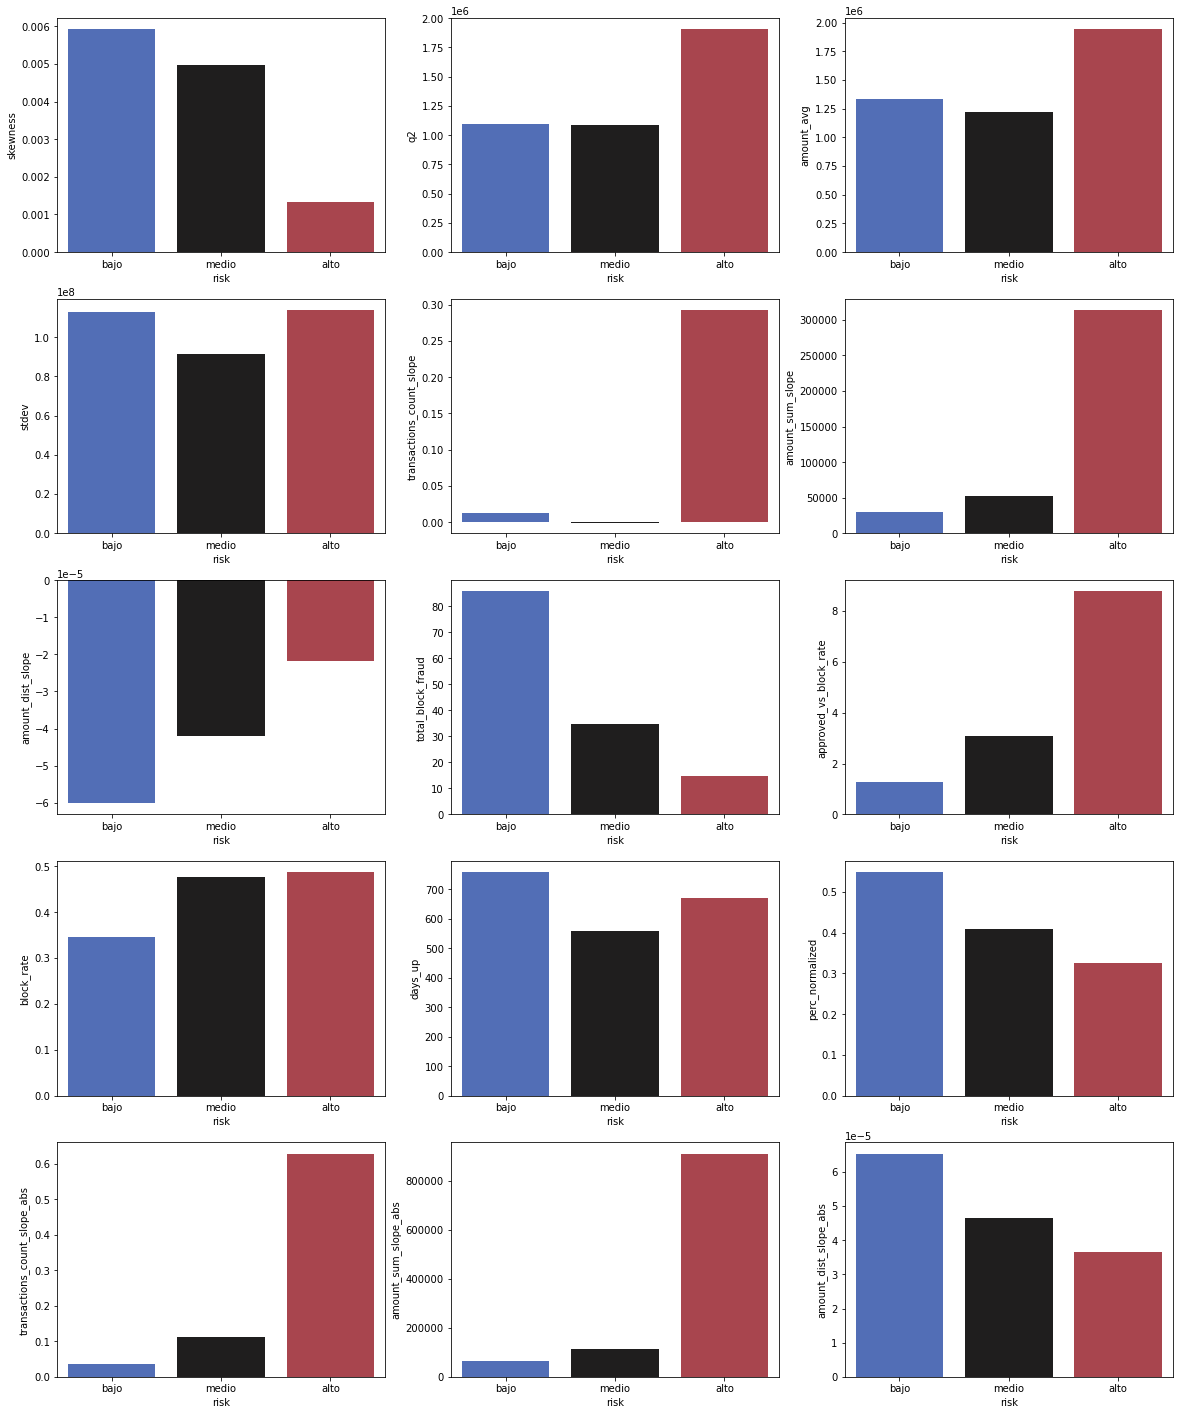

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Se establece las distrubucuón de los subplots
plot_rows,plot_columns=5,3
fig, axes = plt.subplots(plot_rows,plot_columns)

#Se crea la función para calcular la posición de cada figura en el plot
get_coord = lambda i:[int(np.floor(i/plot_columns)),i%plot_columns]

plt.gcf().set_size_inches(20, 5*plot_rows)
for i,col in enumerate(data_group.columns):   
    x,y=get_coord(i)
    sns.barplot(x=data_group.index,
                y=col,
                order=["bajo","medio","alto"],
                data=data_group,
                ax=axes[x,y],
                palette = 'icefire',ci = None)

En la revisión grafica de correspondencia entre la media de las variables con el riesgo, vemos que algunas variables tienen una aparente correlación con el riesgo, como son: 
- skewness
- perc_normalized
- approved_vs_block_rate
- transactions_count_slope_abs
- amount_sum_slope	
- amount_dist_slope_abs

### Gráficos de distribución de las variables

A continuación se verificará la distribución de cada una de las variables por medio de un grafico de cajas

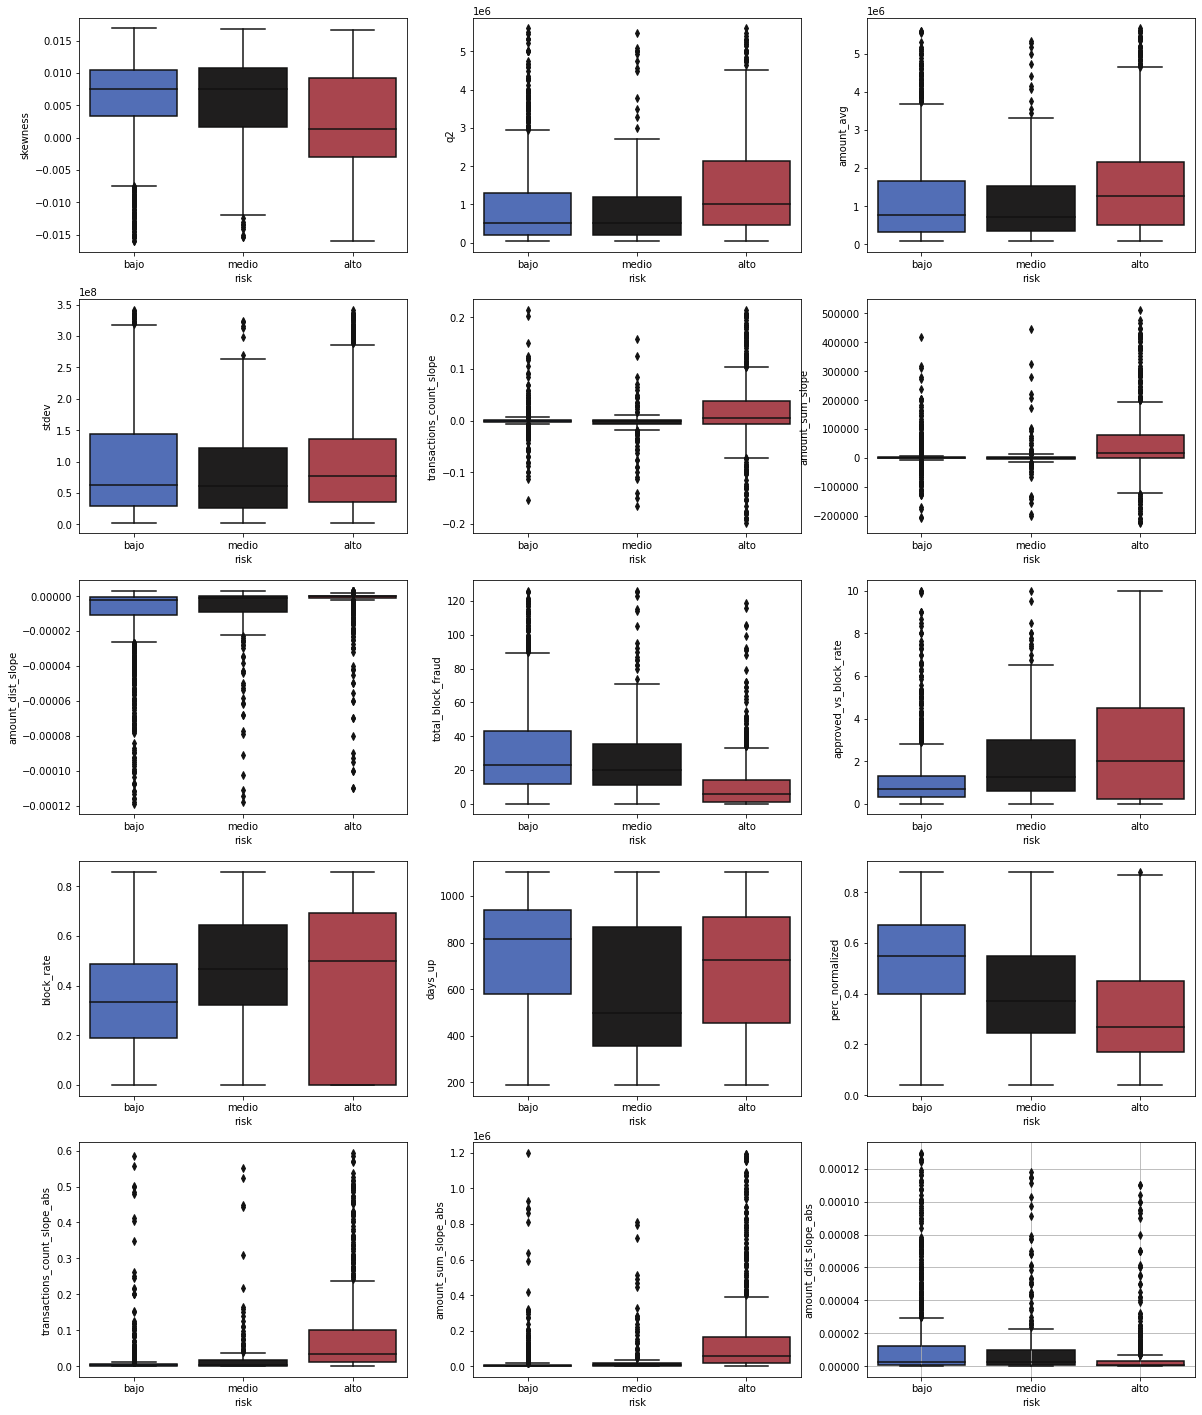

In [25]:
#Se establece las distrubucuón de los subplots
plot_rows,plot_columns=5,3
fig, axes = plt.subplots(plot_rows,plot_columns)

#Se crea la función para calcular la posición de cada figura en el plot
get_coord = lambda i:[int(np.floor(i/plot_columns)),i%plot_columns]

plt.gcf().set_size_inches(20, 5*plot_rows)
for i,col in enumerate(data_group.columns):  
    x,y=get_coord(i)
    #Mascara pera eliminar outliers
    mask= facade[col].between(facade[col].quantile(0.05),facade[col].quantile(0.95))
    #Dataframe de negocios fachada sin outliers
    facade_wol=facade[mask].copy()  
    #Se hace el gráfico
    sns.boxplot(data=facade_wol, 
            x='risk',
            y=col,
            order=["bajo","medio","alto"], 
            ax=axes[x,y],
            palette = 'icefire')
     
plt.grid()
plt.show()


La cajas, nos confirman la correspondencia para perc_normalized, pero para los otros campos no se confirma, por lo cual se realizara un revisión de su distribución para cada uno de los tipos de riesgo de forma puntual.

- skewness
- perc_normalized
- approved_vs_block_rate
- transactions_count_slope_abs
- amount_sum_slope	
- amount_dist_slope_abs

### Histograma de variables relevantes

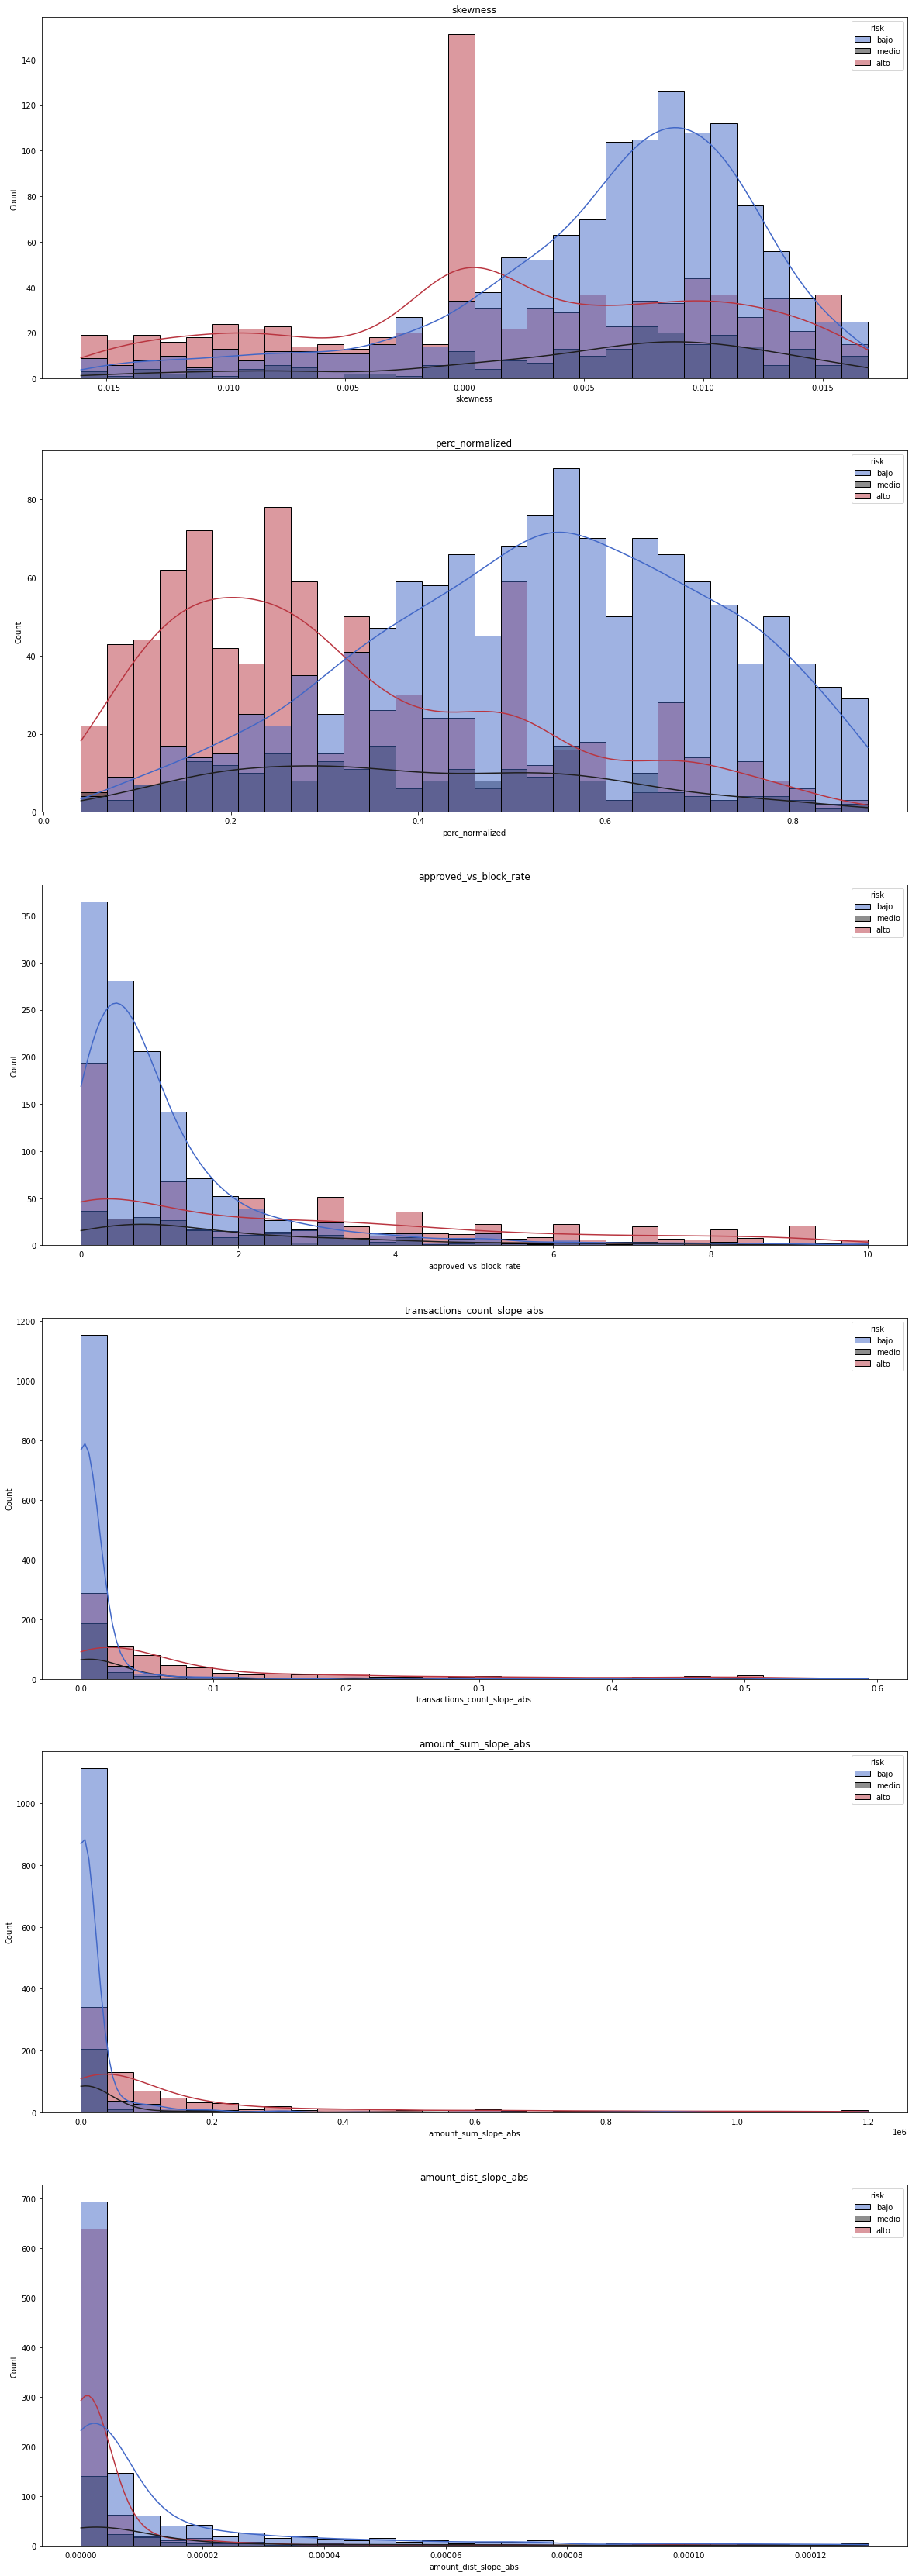

In [14]:

#Definición de variables a revisar
cols=pd.Series(['skewness','perc_normalized','approved_vs_block_rate','transactions_count_slope_abs','amount_sum_slope_abs','amount_dist_slope_abs'])

#Se definen la cantidad de subplots
fig, axes = plt.subplots(cols.shape[0],1)
plt.gcf().set_size_inches(20, 60)
for i,col in cols.items():  
    #Mascara para eliminar outliers
    mask= facade[col].between(facade[col].quantile(0.05),facade[col].quantile(0.95))
    #Dataframe de negocios fachada sin outliers
    facade_wol=facade[mask].copy()  
    #Grafica
    sns.histplot(data=facade_wol, 
                x=col, 
                hue = 'risk',
                palette = 'icefire',
                bins=30, 
                ax=axes[i],
                kde=True).set(title=col)    
     
plt.show()






#### Conclusión:

Se puede ver curvas diferente en las distribuciones de algunas variables, siendo el mas notable, el de la variable de porcentaje de normalización de las transacciones, es decir el porcentaje de transacciones que ocurre sin fallos y algunos cambios en la distribución no tan marcado en las variables slope. En el siguiente capítulo veremos el comportamiento cruzado entre algunas de las variables.


# 4. Analisis de variables cruzadas

In [15]:
#Lista de campos a analizar
#cols.append('risk')
cols=pd.Series(['risk','skewness','perc_normalized','approved_vs_block_rate','transactions_count_slope_abs','amount_sum_slope_abs','amount_dist_slope_abs'])


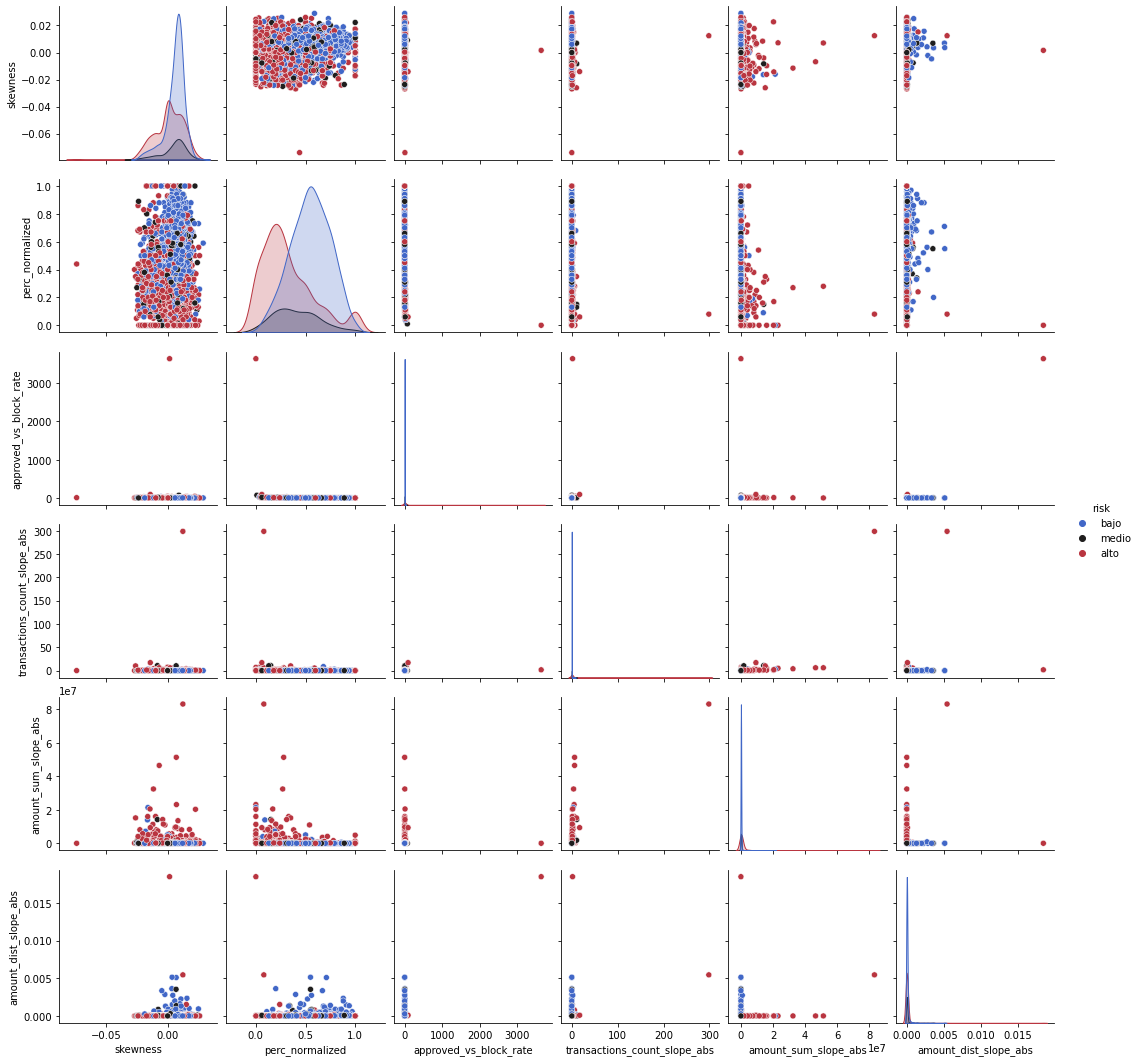

In [16]:
sns.pairplot(facade[cols.tolist()], hue = "risk", palette = 'icefire')

#### Visualizar correlación entre la clase riesgo y las demás variables.

Para esto vamos a generar una nueva varibale, llamada target la cual será 1 si el riesgo es algo y 0 en cualquier otro caso

In [17]:
fn_target = lambda x: 1 if x == 'alto' else 0

facade['target'] = facade.apply(lambda x: 1 if x['risk'] == 'alto' else 0, axis=1)
facade.sample(10)



,merchant_id,skewness,q2,amount_avg,stdev,transactions_count_slope,amount_sum_slope,amount_dist_slope,total_block_fraud,approved_vs_block_rate,block_rate,days_up,perc_normalized,risk,transactions_count_slope_abs,amount_sum_slope_abs,amount_dist_slope_abs,target
1242,XXXX,0.012698,500000.0,778093.0,6.570397e+07,0.000415,2375.0,-2.873456e-06,19.0,0.37255,0.18812,1201.0,0.56,bajo,0.000415,2375.0,2.873456e-06,0
1383,XXXX,0.013039,240000.0,358308.0,2.721974e+07,0.000732,383.0,-6.854839e-06,1.0,0.04762,0.02857,974.0,0.66,bajo,0.000732,383.0,6.854839e-06,0
2497,XXXXX,0.011898,250000.0,338000.0,2.218816e+07,0.020703,13243.0,-3.267974e-06,4.0,1.00000,0.30769,834.0,0.62,alto,0.020703,13243.0,3.267974e-06,1
738,XXXXXX,0.003999,1000000.0,1080737.0,6.056939e+07,-0.000618,-1107.0,8.836524e-08,29.0,1.03571,0.46032,323.0,0.48,bajo,0.000618,1107.0,8.836524e-08,0
1031,XXXXX,0.006121,1988388.0,2449779.0,2.261523e+08,0.012896,50159.0,-2.333950e-07,38.0,2.23529,0.54286,501.0,0.36,bajo,0.012896,50159.0,2.333950e-07,0
1934,XXXXX,-0.005391,399000.0,360815.0,2.125090e+07,-2.236324,-886239.0,-3.756592e-05,350.0,35.00000,0.95890,960.0,0.03,bajo,2.236324,886239.0,3.756592e-05,0
2580,XXXXX,0.005131,1880000.0,2170435.0,1.698087e+08,-0.004230,-11085.0,-3.924023e-06,306.0,1.00000,0.44934,578.0,0.50,bajo,0.004230,11085.0,3.924023e-06,0
222,XXXXX,0.011133,68000.0,82674.0,3.954093e+06,-0.010652,-688.0,-6.589623e-04,20.0,0.20202,0.13699,879.0,0.77,bajo,0.010652,688.0,6.589623e-04,0
1469,XXXXX,0.000000,2500000.0,2500000.0,0.000000e+00,NaN,NaN,NaN,3.0,NaN,1.00000,617.0,0.00,alto,NaN,NaN,NaN,1
501,XXXXXX,0.019116,441000.0,1573005.0,1.776513e+08,-0.040657,6006.0,-1.111342e-06,32.0,3.20000,0.71111,137.0,0.27,medio,0.040657,6006.0,1.111342e-06,0


In [18]:
colsPy=['target','skewness','perc_normalized','approved_vs_block_rate','transactions_count_slope_abs','amount_sum_slope_abs','amount_dist_slope_abs' ]


In [19]:
facade_corr=facade[colsPy].corr()
display(facade_corr)

,target,skewness,perc_normalized,approved_vs_block_rate,transactions_count_slope_abs,amount_sum_slope_abs,amount_dist_slope_abs
target,1.000000,-0.221155,-0.387844,0.045795,0.046542,0.150553,-0.026868
skewness,-0.221155,1.000000,0.147444,-0.010338,0.007397,-0.080586,0.014745
perc_normalized,-0.387844,0.147444,1.000000,-0.076426,-0.047817,-0.142666,0.022843
approved_vs_block_rate,0.045795,-0.010338,-0.076426,1.000000,0.068588,0.003727,0.826047
transactions_count_slope_abs,0.046542,0.007397,-0.047817,0.068588,1.000000,0.661503,0.239632
amount_sum_slope_abs,0.150553,-0.080586,-0.142666,0.003727,0.661503,1.000000,0.133476
amount_dist_slope_abs,-0.026868,0.014745,0.022843,0.826047,0.239632,0.133476,1.000000


In [20]:
facade_corr.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1)

,target,skewness,perc_normalized,approved_vs_block_rate,transactions_count_slope_abs,amount_sum_slope_abs,amount_dist_slope_abs
target,1.000000,-0.221155,-0.387844,0.045795,0.046542,0.150553,-0.026868
skewness,-0.221155,1.000000,0.147444,-0.010338,0.007397,-0.080586,0.014745
perc_normalized,-0.387844,0.147444,1.000000,-0.076426,-0.047817,-0.142666,0.022843
approved_vs_block_rate,0.045795,-0.010338,-0.076426,1.000000,0.068588,0.003727,0.826047
transactions_count_slope_abs,0.046542,0.007397,-0.047817,0.068588,1.000000,0.661503,0.239632
amount_sum_slope_abs,0.150553,-0.080586,-0.142666,0.003727,0.661503,1.000000,0.133476
amount_dist_slope_abs,-0.026868,0.014745,0.022843,0.826047,0.239632,0.133476,1.000000


En este momento podemos decir que existe correlación con la variable target asi:

- Correlación Negativa: skewness, perc_normalized
- Correlación Positiva: amount_sum_slope_abs
- Una correlación que puede ser interesante y la revisaremos más adelante entre approved_vs_block_rate y amount_dist_slope_abs

Aunque para el tipo de datos y de problema se debería afrontar como un problema de clasificación y no de regressión, pero nos sirve para validar la información anterior.

### Visualización pares de variables

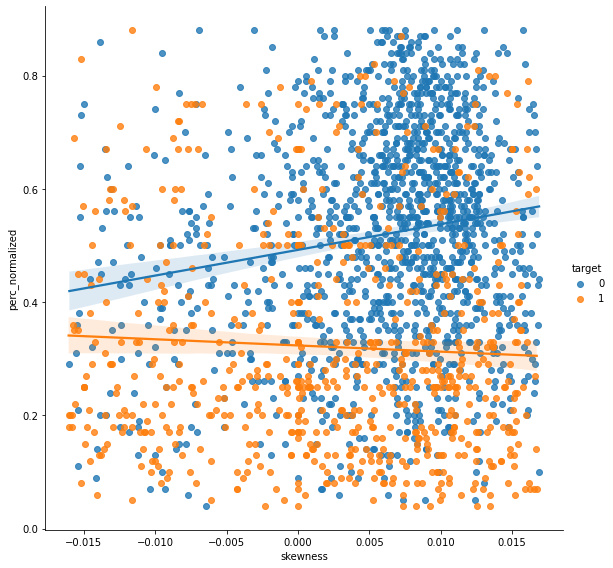

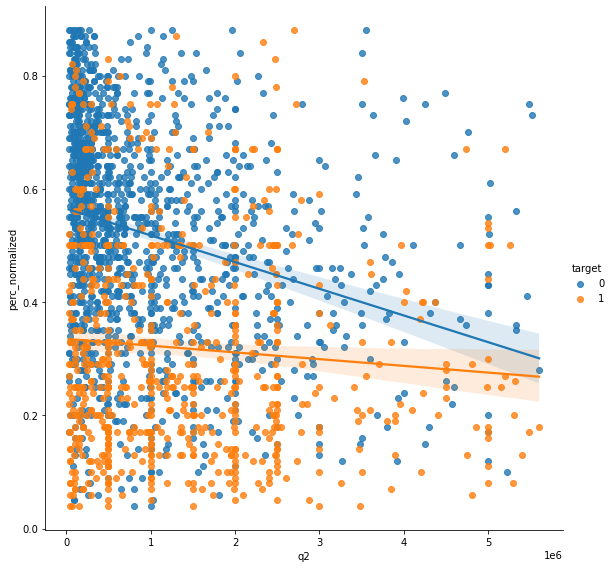

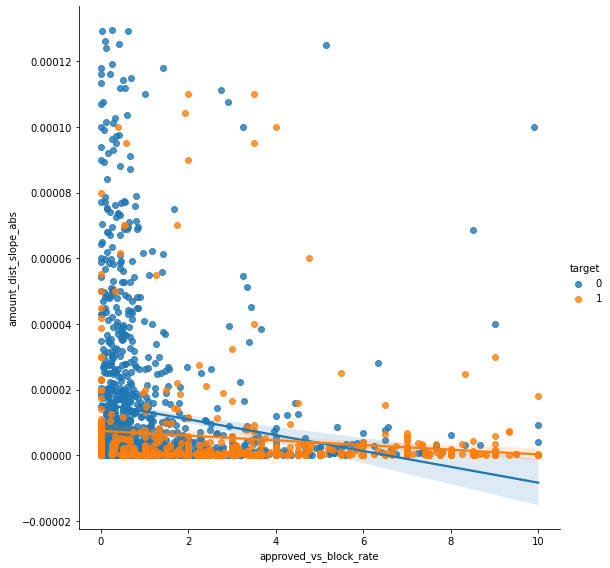

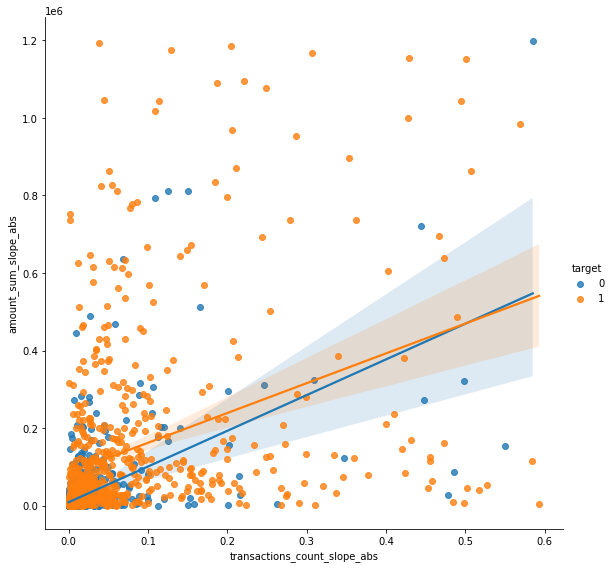

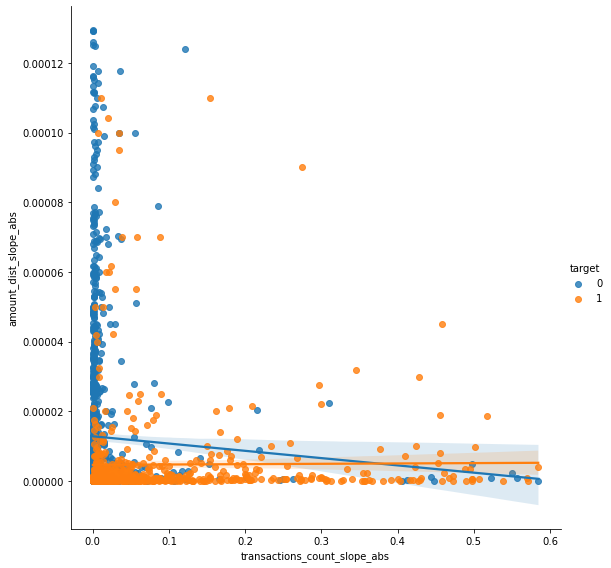

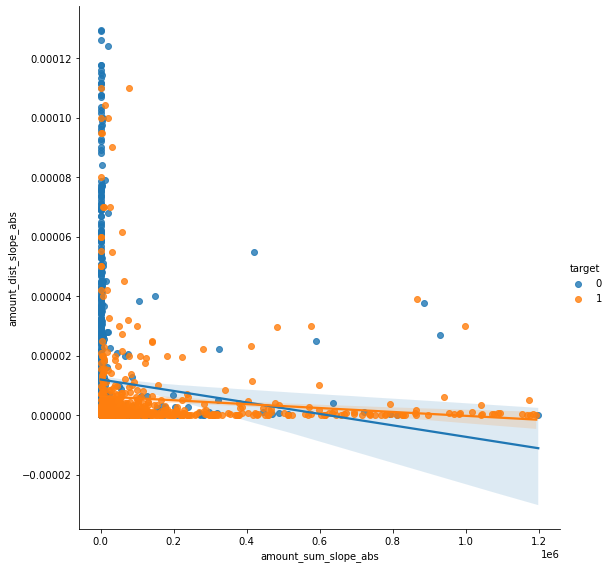

In [22]:
parejas = np.array([('skewness','perc_normalized'),
                    ('q2','perc_normalized'),
                    ('approved_vs_block_rate','amount_dist_slope_abs'),
                    ('transactions_count_slope_abs','amount_sum_slope_abs'),
                    ('transactions_count_slope_abs','amount_dist_slope_abs'),
                    ('amount_sum_slope_abs','amount_dist_slope_abs')])



for pareja in parejas:
    col1,col2=pareja
    mask= facade[col1].between(facade[col1].quantile(0.05),facade[col1].quantile(0.95)) & facade[col2].between(facade[col2].quantile(0.05),facade[col2].quantile(0.95))
    facade_wol=facade[mask].copy() 
    #plt.gcf().set_size_inches(15, 15)
    sns.lmplot(x=col1, y=col2, hue="target", data=facade_wol,height=8)


#### Conclusión:


Vemos algunas parejas de variables que pueden tener incidencia sobre la clasificación de las clases de riesgo, y que pueden llegar importantes para un modelo de entrenamiento por clasificación, algunos de los pares de variables interesantes a tener en cuenta son:

- 'skewness','perc_normalized'
- 'approved_vs_block_rate','amount_dist_slope_abs'
- 'transactions_count_slope_abs','amount_dist_slope_abs'


#### Despedida


Con este análisis pretendo, demostrar los conocimientos adquiridos en la materia de Python para la inteligencia artificial, en lo posible traté cubrir varios aspectos enseñados en clase.

Saludos cordiales y muchas gracias por el conocimiento compartido.


Efraím Alberto Casas H